In [ ]:


import os
import skimage
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import glob
from skimage import io
import seaborn as sns 
from skimage import color


from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve  
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix





In [ ]:


path_o = "F:\Dataset\EnglishImg\English\Img\GoodImg\Bmp\Sample051\*"

path_q = "F:\Dataset\EnglishImg\English\Img\GoodImg\Bmp\Sample053\*"


In [ ]:

path_o_paths =  glob.glob(  path_o )

path_q_paths =  glob.glob(  path_q )


In [ ]:

print( len(path_o_paths  ))

print( len(path_q_paths  ))


148
54


In [ ]:
 

oq_imgs_list = [ ] 
oq_label_list = [ ] 


for path in path_o_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  # 30*30*3
    
    img_gray =   color.rgb2gray( img_resized  )   #  # 30*30
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    oq_imgs_list.append(  img_reshaped )
    
    oq_label_list.append( 0 )
    

In [ ]:
 

for path in path_q_paths:
    
    img = io.imread( path )
           
    img_resized =  resize( img , (30 , 30 , 3 ) )  # 30*30*3
    
    img_gray =   color.rgb2gray( img_resized  )   #  # 30*30
    
    img_reshaped =  img_gray.reshape( ( 900 ) )
    
    oq_imgs_list.append(  img_reshaped )
    
    oq_label_list.append( 1 )
    
    

In [ ]:

print( len(oq_imgs_list  ))

print( len(oq_label_list  ))


202
202


In [ ]:



X_train, X_test, y_train, y_test = train_test_split(  oq_imgs_list , oq_label_list, test_size=0.2, stratify=oq_label_list , random_state=42)



In [ ]:

Logistic_model = LogisticRegression ( )


In [ ]:

Logistic_model = Logistic_model.fit(  X_train ,  y_train  )


C:\Users\Hussien_PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:


predict_y_test =  Logistic_model.predict( X_test  )

predict_y_train =  Logistic_model.predict( X_train  )



In [ ]:


print( accuracy_score(   y_test ,  predict_y_test  )  )


print( accuracy_score(   y_train ,  predict_y_train  )  )


0.7804878048780488
0.9565217391304348


In [ ]:
def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
    
    print( "Confusion Matrix")
    print( conf_mat )
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    

Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        30
           1       1.00      0.18      0.31        11

    accuracy                           0.78        41
   macro avg       0.88      0.59      0.59        41
weighted avg       0.83      0.78      0.72        41

Confusion Matrix
[[30  0]
 [ 9  2]]


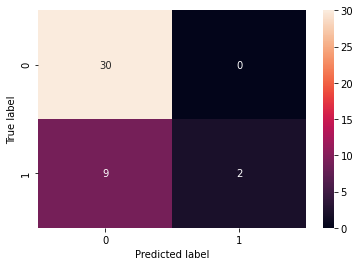

In [ ]:


drawing_conf_matrix( y_test ,  predict_y_test )
    
    

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.84      0.91        43

    accuracy                           0.96       161
   macro avg       0.97      0.92      0.94       161
weighted avg       0.96      0.96      0.96       161

Confusion Matrix
[[118   0]
 [  7  36]]


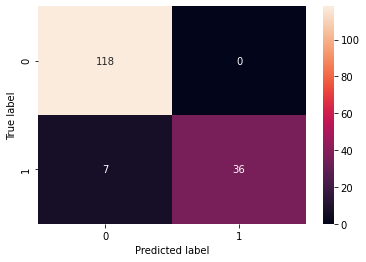

In [ ]:

drawing_conf_matrix(  y_train ,  predict_y_train )


In [ ]:

from sklearn.metrics import confusion_matrix


In [ ]:

conf_matrix_test = confusion_matrix(  y_test ,  predict_y_test  )


In [ ]:


Accu = np.sum( np.diag( conf_matrix_test) ) / np.sum( conf_matrix_test )


In [ ]:

Accu

0.7804878048780488